# rethinking

(From McElreath's page, with some editing)

This R package accompanies a course and book on Bayesian data analysis: McElreath 2020. Statistical Rethinking, 2nd edition, CRC Press. 

It contains tools for conducting both quick quadratic approximation of the posterior distribution as well as Hamiltonian Monte Carlo (through RStan or cmdstanr - mc-stan.org). 

Many packages do this. 

The signature difference of this package is that it forces the user to specify the model as a list of explicit distributional assumptions. 

This is more tedious than typical formula-based tools, but it is also much more flexible and powerful and---most important---useful for teaching and learning. When students have to write out every detail of the model, they actually learn the model.

For example, a simple Gaussian model could be specified with this list of formulas:

```
f <- alist(
    y ~ dnorm( mu , sigma ),
    mu ~ dnorm( 0 , 10 ),
    sigma ~ dexp( 1 )
)
```

The first formula in the list is the probability of the outcome (likelihood); the second is the prior for mu; the third is the prior for sigma.

## Quick Installation

You can find a manual with [expanded installation and usage instructions here.](http://xcelab.net/rm/software/)

Here's the brief version.

You'll need to install rstan first.

### Advice: Install R packages from the R console, either the R command line or RSudio (but not from a Jupyter notebook).

(This is not mandatory: sometimes `install.package()` from a notebook cell will work, but $\;\dots$

### Another advice: before calling `install.package()` close Jupyter notebooks or, at least, restart R in RStudio.

Otherwise some R package files are blocked and cannot be overwritten, etc.

Go to [MC.Stan.org](http://mc-stan.org) and follow the instructions for your platform. The biggest challenge is getting a C++ compiler configured to work with your installation of R. The instructions at [RStan Getting Started](https://github.com/stan-dev/rstan/wiki/RStan-Getting-Started) are quite thorough. 

Obey them, and you'll likely succeed. Essentially this amounts to:

```
install.packages("rstan", dependencies = TRUE)
```

The following packages are needed at some point, so better make sure they are installed:

```
install.packages(c("coda","mvtnorm","devtools","loo","dagitty"),dependencies=TRUE)
```

For the time being we will not require the command line version, 'cmdstanr'. Anyway here there are the installation instructions:

>There are some advantages to accessing Stan through `cmdstanr` rather than `rstan`. These advantages include faster updates and therefore quicker access to new features. 

>If you want to access Stan using the `cmdstanr` package instead, then you may install that as well with

```
    devtools::install_github("stan-dev/cmdstanr")
```

>If you haven't installed `cmdstan` previously, you will also need to do that with `install_cmdstan()`.

>The `install_cmdstan()` function attempts to download and install the latest release of [CmdStan](https://github.com/stan-dev/cmdstan/releases/latest). 

>See the first few sections of the [CmdStan installation guide](https://mc-stan.org/docs/cmdstan-guide/cmdstan-installation.html) for details on the C++ toolchain required for installing CmdStan.

>Then you need to add `cmdstan=TRUE` to any `ulam` code to use `cmdstan` instead of `rstan`. To use `cmdstan` as the default interface, do `set_ulam_cmdstan(TRUE)`.

Once `rstan` and/or `cmdstan´ are installed (almost there), then you can install `rethinking` from within R using:

```
devtools::install_github("rmcelreath/rethinking",dependencies=TRUE)
```

If there are any problems, they likely arise when trying to install `rstan`, so the `rethinking` package has little to do with it. 

Consult the RStan section of the website at mc-stan.org for the latest information on RStan.

In [1]:
## R code 2.1
ways <- c( 0 , 3 , 8 , 9 , 0 )
ways/sum(ways)

[1] 0.00 0.15 0.40 0.45 0.00

In [2]:
## R code 2.2
dbinom( 6 , size=9 , prob=0.5 )

[1] 0.1640625

In [3]:
## R code 2.3
# define grid
p_grid <- seq( from=0 , to=1 , length.out=20 )

In [4]:
# define prior
prior <- rep( 1 , 20 )

In [5]:
# compute likelihood at each value in grid
likelihood <- dbinom( 6 , size=9 , prob=p_grid )

In [6]:
# compute product of likelihood and prior
unstd.posterior <- likelihood * prior

In [7]:
# standardize the posterior, so it sums to 1
posterior <- unstd.posterior / sum(unstd.posterior)

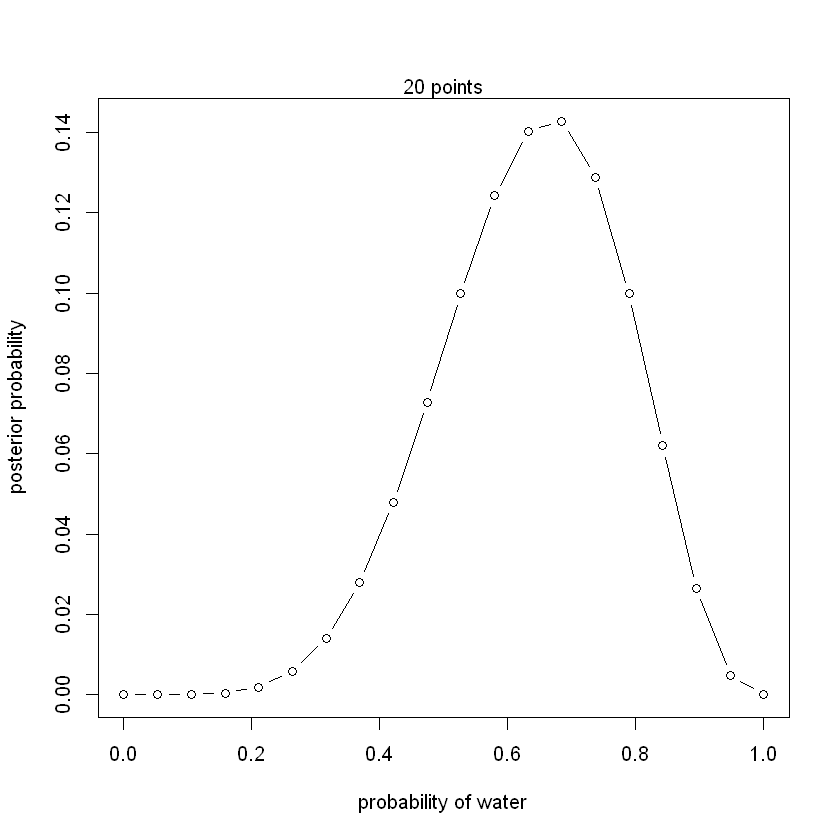

In [8]:
## R code 2.4
plot( p_grid , posterior , type="b" ,
    xlab="probability of water" , ylab="posterior probability" )
mtext( "20 points" )

In [9]:
## R code 2.5
prior <- ifelse( p_grid < 0.5 , 0 , 1 )
prior <- exp( -5*abs( p_grid - 0.5 ) )

In [10]:
## R code 2.6
require(rethinking)
#
options(mc.cores = parallel::detectCores()).
rstan_options(auto_write = TRUE)
#
globe.qa <- map(
    alist(
        w ~ dbinom(9,p) ,  # binomial likelihood
        p ~ dunif(0,1)     # uniform prior
    ) ,
    data=list(w=6) )

Loading required package: rethinking

Loading required package: rstan

Loading required package: StanHeaders

Loading required package: ggplot2

rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)

Do not specify '-march=native' in 'LOCAL_CPPFLAGS' or a Makevars file

Loading required package: parallel

rethinking (Version 2.13)


Attaching package: 'rethinking'


The following object is masked from 'package:stats':

    rstudent




In [11]:
# display summary of quadratic approximation
precis( globe.qa )

,mean,sd,5.5%,94.5%
,<dbl>,<dbl>,<dbl>,<dbl>
p,0.6666666,0.1571338,0.4155365,0.9177968


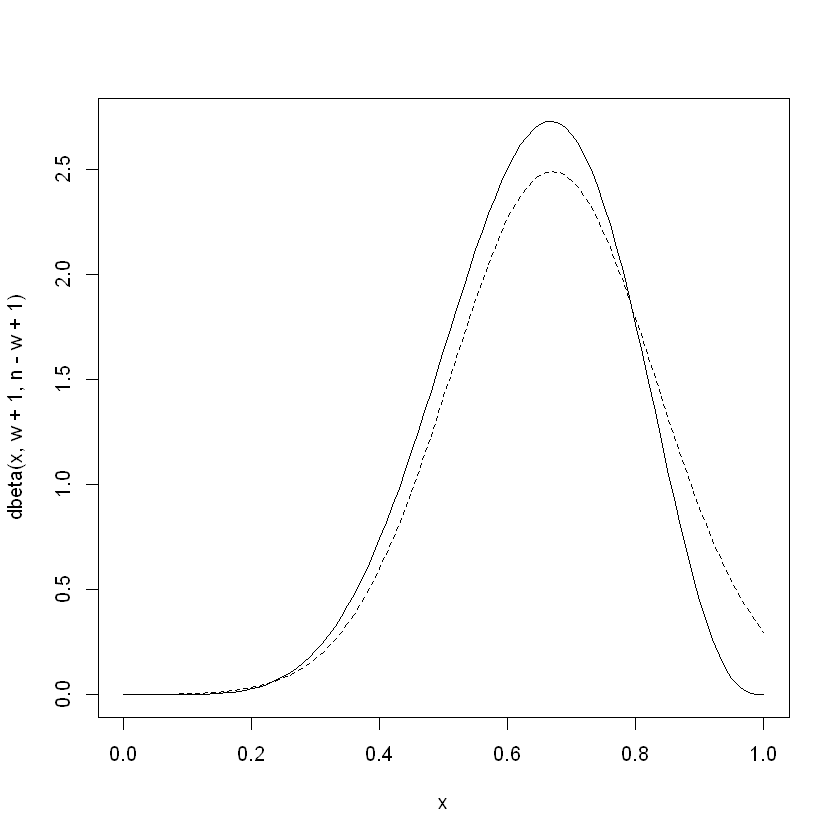

In [12]:
## R code 2.7
# analytical calculation
w <- 6
n <- 9
curve( dbeta( x , w+1 , n-w+1 ) , from=0 , to=1 )
# quadratic approximation
curve( dnorm( x , 0.67 , 0.16 ) , lty=2 , add=TRUE )